In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data analysis on youTube trending videos

In [2]:
df=pd.read_csv("INvideos.csv")
print(df)

          video_id trending_date  \
0      kzwfHumJyYc      17.14.11   
1      zUZ1z7FwLc8      17.14.11   
2      10L1hZ9qa58      17.14.11   
3      N1vE8iiEg64      17.14.11   
4      kJzGH0PVQHQ      17.14.11   
...            ...           ...   
37347  iNHecA3PJCo      18.14.06   
37348  dpPmPbhcslM      18.14.06   
37349  mV6aztP58f8      18.14.06   
37350  qxqDNP1bDEw      18.14.06   
37351  wERgpPK44w0      18.14.06   

                                                   title       channel_title  \
0      Sharry Mann: Cute Munda ( Song Teaser) | Parmi...     Lokdhun Punjabi   
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...             HJ NEWS   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...                TFPC   
3                         Eruma Saani | Tamil vs English         Eruma Saani   
4      why Samantha became EMOTIONAL @ Samantha naga ...          Filmylooks   
...                                                  ...                 ...   
37347  

In [3]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [4]:
df.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
dtype: bool

In [5]:
df["description"]=df["description"].fillna(value=" ")

In [6]:
df.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description               False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

## Which year was the data collected

In [8]:
cdf=df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts().to_frame().reset_index() .rename(columns={"index": "year", "trending_date": "No_of_videos"})


In [9]:
print(cdf)

  No_of_videos  count
0         2018  28293
1         2017   9059


## Bar chart

<BarContainer object of 2 artists>

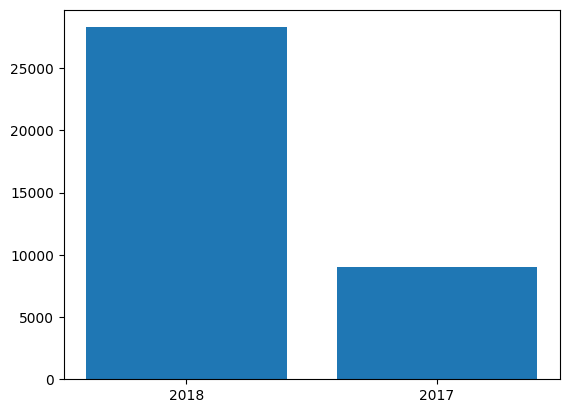

In [10]:
plt.bar(cdf['No_of_videos'],cdf['count'])

## What is the percentage of videos released in that particular year?

In [11]:
df['trending_date'].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)
               

trending_date
2018    0.757469
2017    0.242531
Name: proportion, dtype: float64

### Description

In [12]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


array([[<Axes: title={'center': 'views'}>]], dtype=object)

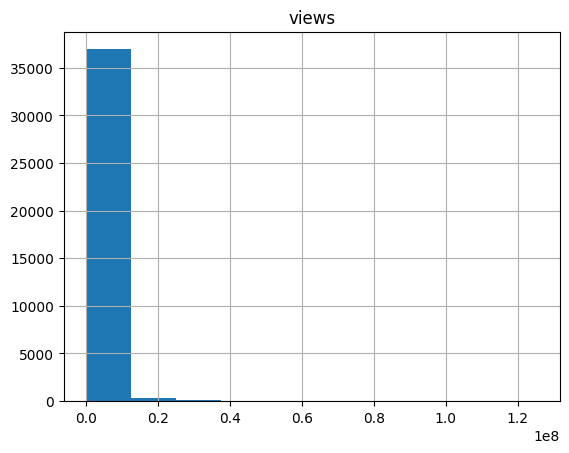

In [13]:
df.hist('views')

## No. of videos less than 1mil views

In [14]:
df[df['views']>1e6]['views'].count()/df['views'].count()*100

20.43264082244592

array([[<Axes: title={'center': 'likes'}>]], dtype=object)

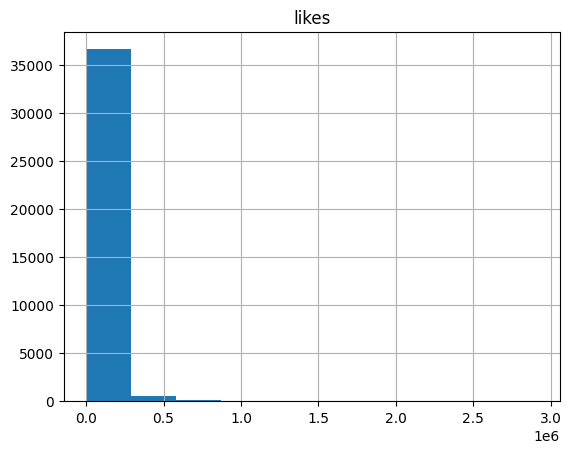

In [15]:
df.hist('likes')

## Percentage of videos with >50k likes


In [16]:
df[df['likes']>100000]['likes'].count()/df['likes'].count()*100

5.9327479117584065

array([[<Axes: title={'center': 'comment_count'}>]], dtype=object)

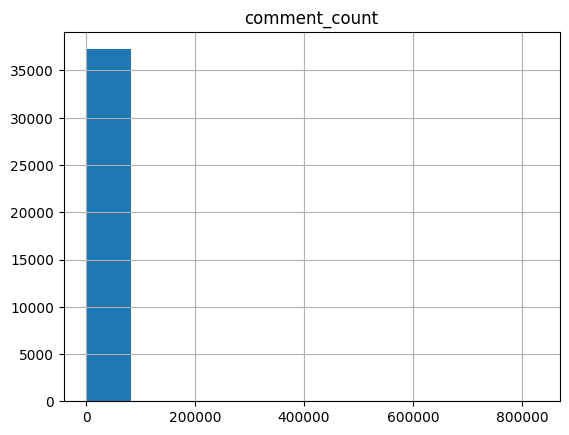

In [17]:
df.hist('comment_count')

## Percentage of videos with <1k comments


In [18]:
df[df['comment_count']<1000]['comment_count'].count()/df['comment_count'].count()*100

70.71910473334762

## Description of non numerical columns

In [19]:
df.describe(include='O')



,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,37352,37352,37352,37352,37352,37352,37352,37352
unique,16307,205,16721,1426,16339,12578,16523,13993
top,#NAME?,17.14.11,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,2018-04-21T13:30:01.000Z,[none],https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,
freq,511,200,19,284,18,1381,16,561


## Calculate the length

In [20]:
df['title_lenght']=df['title'].apply(lambda x: len(x))

In [21]:
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_lenght
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,81
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",58
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,58
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,30
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,88


<Axes: >

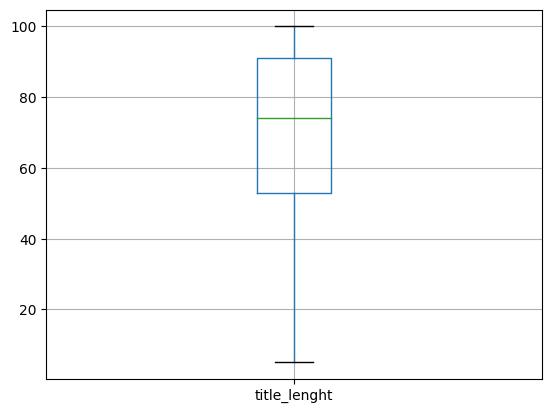

In [22]:
df.boxplot('title_lenght')

## Relation between title lenght and the no. of views

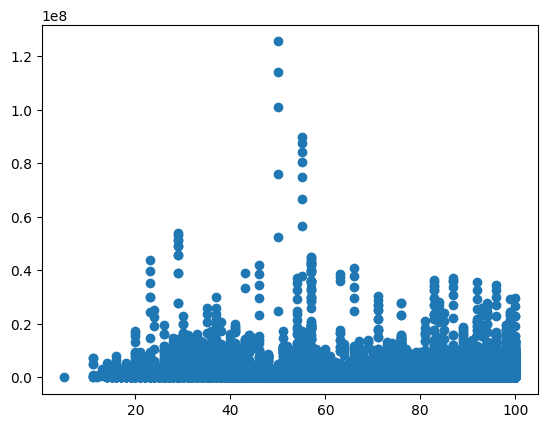

In [23]:
plt.scatter(df['title_lenght'],df['views'])



## Grouping of data based on category ID

In [24]:
df.groupby('video_id').sum()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_lenght
video_id,,,,,,,,,,,,,,,,
#NAME?,17.14.1117.14.1117.14.1117.15.1117.15.1117.16....,స‌మంత కంట‌త‌డి | Samantha became EMOTIONAL @ S...,Friday PosterJansattaHealth Tips for YouAstroM...,10976,2017-11-13T08:59:27.000Z2017-11-11T09:09:06.00...,"స‌మంత కంట‌త‌డి|""Samantha became EMOTIONAL @ Sa...",765625280,17514793,790773,1350883,https://i.ytimg.com/vi/-b0ww7L2MGU/default.jpg...,20,19,0,స‌మంత కంట‌త‌డి | Samantha became EMOTIONAL @ S...,37331
#VALUE!,18.09.0318.10.0318.11.0318.12.0318.19.0318.20....,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,RahasyaRahasyaRahasyaRahasyaRajshri MarathiRaj...,180,2018-03-08T07:03:27.000Z2018-03-08T07:03:27.00...,"myth|""facts""|""top interesting facts""|""most int...",1176951,41991,1565,2946,https://i.ytimg.com/vi/-L2-A0Saw30/default.jpg...,0,0,0,FOLLOW US ON FACEBOOK : https://goo.gl/UhDWrn\...,636
-0N9r10xb_0,17.19.1117.20.11,19 नवंबर शनि अमावस्या के अगले दिन बड़ा रविवार ब...,Magical NuskheMagical Nuskhe,52,2017-11-18T14:20:54.000Z2017-11-18T14:20:54.000Z,19 नवंबर शनि अमावस्या के अगले दिन बड़ा रविवार ब...,204502,2442,330,55,https://i.ytimg.com/vi/-0N9r10xb_0/default.jpg...,0,0,0,19 नवंबर शनि अमावस्या के अगले दिन बड़ा रविवार ब...,200
-0WuM6ctLHg,18.11.0218.12.0218.13.02,மிரளவைக்கும் 5 நம்பமுடியாத கண்டுபிடிப்புகள் | ...,Kollywood TalkKollywood TalkKollywood Talk,66,2018-02-10T08:07:15.000Z2018-02-10T08:07:15.00...,"amazing invention|""amazing bike in the world""|...",823461,11040,417,272,https://i.ytimg.com/vi/-0WuM6ctLHg/default.jpg...,0,0,0,மிரளவைக்கும் 5 நம்பமுடியாத கண்டுபிடிப்புகள் | ...,267
-0mcgX4ro7I,18.16.0318.17.03,Bhabi Ji Ghar Par Hain - भाबीजी घर पर हैं - Ep...,And TVAnd TV,48,2018-03-15T00:28:23.000Z2018-03-15T00:28:23.000Z,"and tv|""&TV""|""Bhabhiji Ghar Par Hain""|""full ep...",434095,2152,236,139,https://i.ytimg.com/vi/-0mcgX4ro7I/default.jpg...,0,0,0,To watch FULL episode of Bhabi Ji Ghar Par Hai...,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zykZhNk7BNQ,18.15.02,आज है अमावस्या ।। यह टोटका करते ही शत्रु बर्बा...,Om Namoh Narayan,26,2018-02-15T03:38:56.000Z,"Vashikaran|""Photo se Vashikaran""|""Naam Se Vash...",11876,334,27,0,https://i.ytimg.com/vi/zykZhNk7BNQ/default.jpg,1,0,0,आज है अमावस्या ।। यह टोटका करते ही शत्रु बर्बा...,96
zys43i_RKHM,18.31.0518.01.06,Mogalirekulu | 31st May 2018 | Gemini TVMogali...,Gemini TVGemini TV,48,2018-05-31T13:08:26.000Z2018-05-31T13:08:26.000Z,"Gemini TV|""Reality Show""|""Telugu Serials""|""Tel...",160420,1627,122,217,https://i.ytimg.com/vi/zys43i_RKHM/default.jpg...,0,0,0,Mogalirekulu is a family drama show. The story...,80
zyvYkpoLeSU,18.29.0118.30.0118.31.01,Bigg Boss 5 Kannada Winner | Kannada Big Boss ...,Namma KFINamma KFINamma KFI,72,2018-01-28T17:59:20.000Z2018-01-28T17:59:20.00...,"chandan shetty big boss songs|""bigg boss kanna...",124966,649,105,80,https://i.ytimg.com/vi/zyvYkpoLeSU/default.jpg...,0,0,0,Bigg Boss 5 Kannada Winner Kannada Big Boss Wi...,270


## Videos got removed or had errors

In [25]:
df['video_error_or_removed'].value_counts()

video_error_or_removed
False    37341
True        11
Name: count, dtype: int64

Text(0.5, 1.0, 'Video Error or Removed')

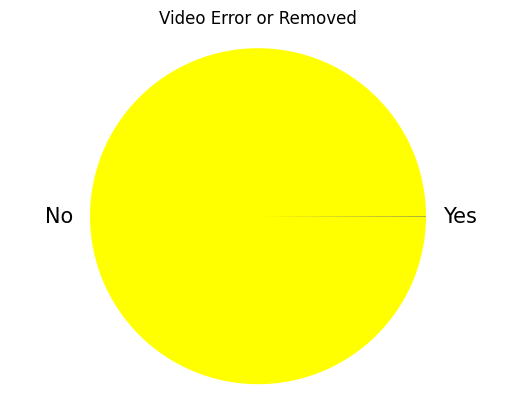

In [26]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
plt.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['yellow', 'black'], textprops={'color': 'black','size':15})
plt.axis('equal')
plt.title('Video Error or Removed')


## Percentage of videos that have comments disabled

In [27]:
df['comments_disabled'].value_counts()

comments_disabled
False    36148
True      1204
Name: count, dtype: int64

Text(0.5, 1.0, 'Comments disabled')

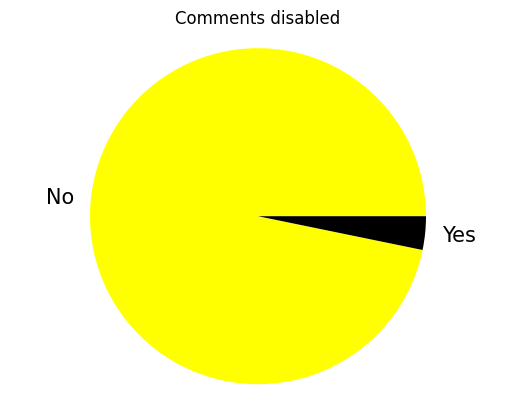

In [28]:
value_counts = df["comments_disabled"].value_counts().to_dict()
plt.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['yellow', 'black'], textprops={'color': 'black','size':15})
plt.axis('equal')
plt.title('Comments disabled')


## Percentage of videos that have Ratings disabled

In [29]:
df['ratings_disabled'].value_counts()

ratings_disabled
False    36571
True       781
Name: count, dtype: int64

Text(0.5, 1.0, 'ratings_disabled')

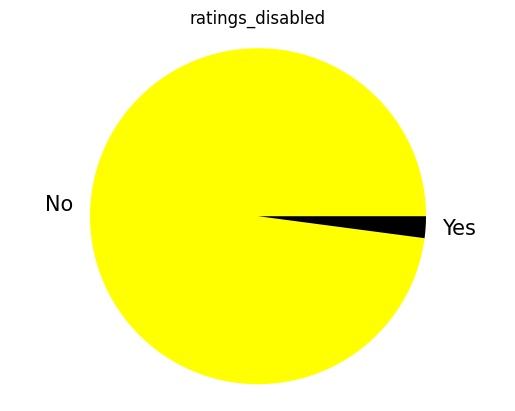

In [30]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
plt.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['yellow', 'black'], textprops={'color': 'black','size':15})
plt.axis('equal')
plt.title('ratings_disabled')


## Videos have both comments and ratings disabled

In [31]:
len(df[(df['comments_disabled']==True)&(df['ratings_disabled']==True).index])

588